In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv("mushroom_cleaned.csv")
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
df[df['class']==0]

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
717,997,2,0,10,2.124354,1722,11,0.943195,0
718,914,2,0,10,1.475779,1418,11,0.888450,0
719,865,2,0,10,2.104459,1971,11,0.943195,0
720,841,6,0,10,2.024880,1384,11,0.888450,0
721,914,6,0,10,0.660086,1453,11,0.888450,0
...,...,...,...,...,...,...,...,...,...
53677,422,3,3,2,0.585337,1943,6,0.027372,0
53678,683,1,3,2,0.346598,1801,6,0.027372,0
53679,615,4,3,2,0.255081,1835,6,0.027372,0
53680,374,1,3,2,0.772350,1849,6,0.027372,0


Text(0.5, 1.0, "Distribution de la variable 'class'")

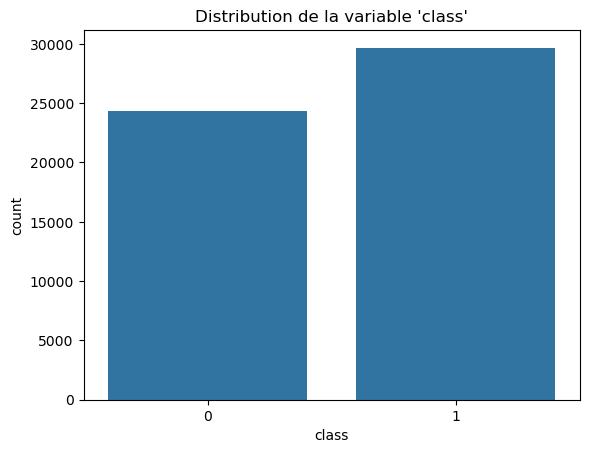

In [6]:
# Diagramme à barre de la variable 'diagnosis'
sns.countplot(x='class', data = df).set_title("Distribution de la variable 'class'")

In [7]:

# Préparation des données
X = df.drop(columns=['class'])
y = df['class']


In [8]:

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Entraînement du modèle Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:

# Prédiction sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

In [11]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.9907
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



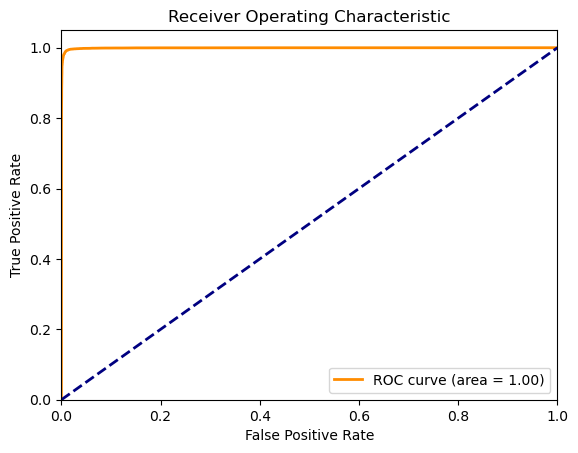

In [12]:

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [13]:
#overfiting problem, 

In [14]:
# cap-diameter	cap-shape	gill-attachment	gill-color	stem-height	stem-width	stem-color	season

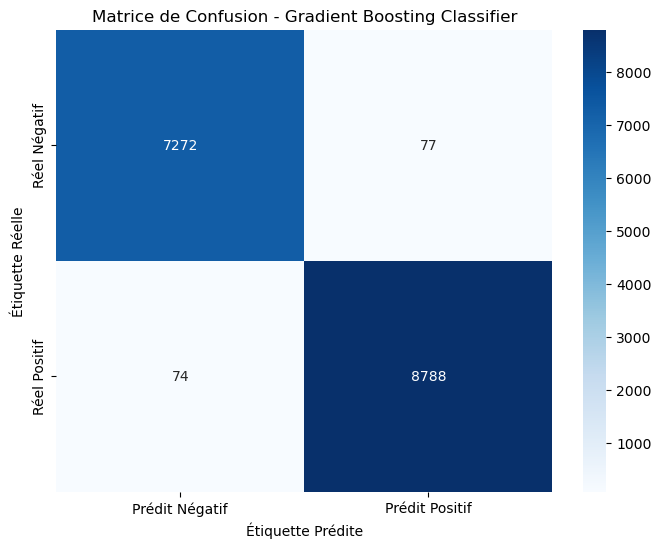

In [15]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Création de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prédit Négatif', 'Prédit Positif'], yticklabels=['Réel Négatif', 'Réel Positif'])
plt.ylabel('Étiquette Réelle')
plt.xlabel('Étiquette Prédite')
plt.title('Matrice de Confusion - Gradient Boosting Classifier')
plt.show()

## dump of model

In [28]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

## GBooSt

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbc.fit(X_train, y_train)

# Predict on the test set
y_pred = gbc.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7349
           1       0.97      0.95      0.96      8862

    accuracy                           0.96     16211
   macro avg       0.96      0.96      0.96     16211
weighted avg       0.96      0.96      0.96     16211



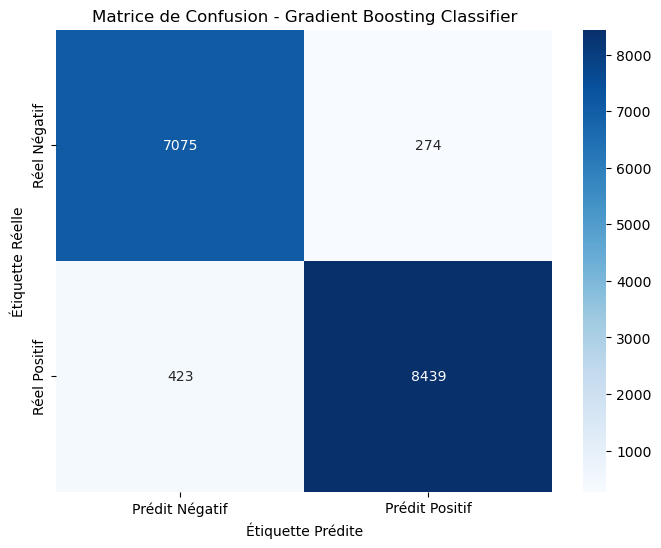

In [17]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Création de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prédit Négatif', 'Prédit Positif'], yticklabels=['Réel Négatif', 'Réel Positif'])
plt.ylabel('Étiquette Réelle')
plt.xlabel('Étiquette Prédite')
plt.title('Matrice de Confusion - Gradient Boosting Classifier')
plt.show()